
# House Price Prediction — Pro Notebook (Beginner-Friendly)
**What this notebook contains:**

- Clean explanation and step-by-step code
- EDA (tables + charts)
- Feature selection
- Linear Regression model training
- Model evaluation (R², MSE, MAE)
- Function for predicting new houses

**How to use:**
1. Put `USA_Housing.csv` in the same folder as this notebook (already provided).
2. Run cells from top to bottom.
3. If a library is missing, run `pip install -r requirements.txt`.

---


In [4]:

# Cell 2 — Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Display settings for readability
pd.set_option('display.max_columns', None)
%matplotlib inline


In [5]:
# Cell 3 — Load dataset
df = pd.read_csv("USA_Housing.csv")
print("Dataset loaded: rows =", len(df))
df.head()

Dataset loaded: rows = 1000


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,72450.71,31.19,4.82,4.3,22048,185840.99
1,62926.04,27.40,5.36,4.3,34532,217174.37
2,74715.33,20.48,4.71,3.4,35270,148540.81
3,87845.45,14.82,5.19,2.7,42089,247311.88
4,61487.70,25.59,3.61,1.8,14497,178356.88


In [6]:
# Cell 4 — Quick info & statistics
display(df.info())
display(df.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              1000 non-null   float64
 1   Avg. Area House Age           1000 non-null   float64
 2   Avg. Area Number of Rooms     1000 non-null   float64
 3   Avg. Area Number of Bedrooms  1000 non-null   float64
 4   Area Population               1000 non-null   int64  
 5   Price                         1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


None

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,65293.60,20.60,5.51,4.00,34372.73,255255.68
std,14676.62,7.90,0.98,1.05,14598.32,65786.69
min,20000.00,1.00,2.48,1.00,1000.00,47365.94
25%,55286.15,15.15,4.85,3.30,24760.75,210170.12
50%,65379.51,20.50,5.50,4.00,34726.50,254582.72
75%,74719.16,25.83,6.16,4.70,44587.00,299680.78
max,122790.97,45.54,9.43,6.00,81694.00,503405.69


In [7]:
# Cell 5 — Missing values check
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


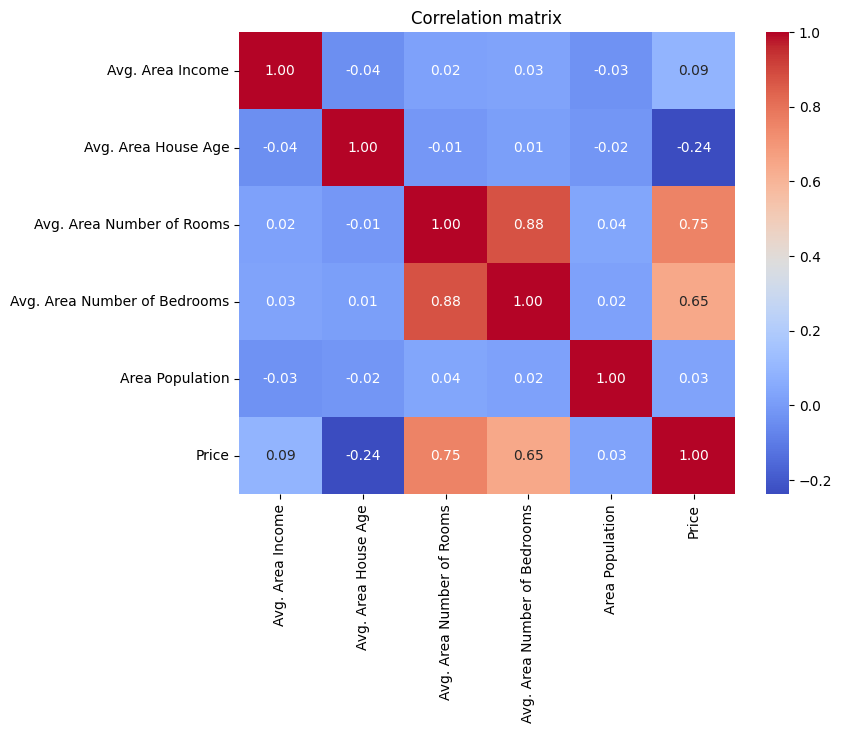

In [8]:
# Cell 6 — Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

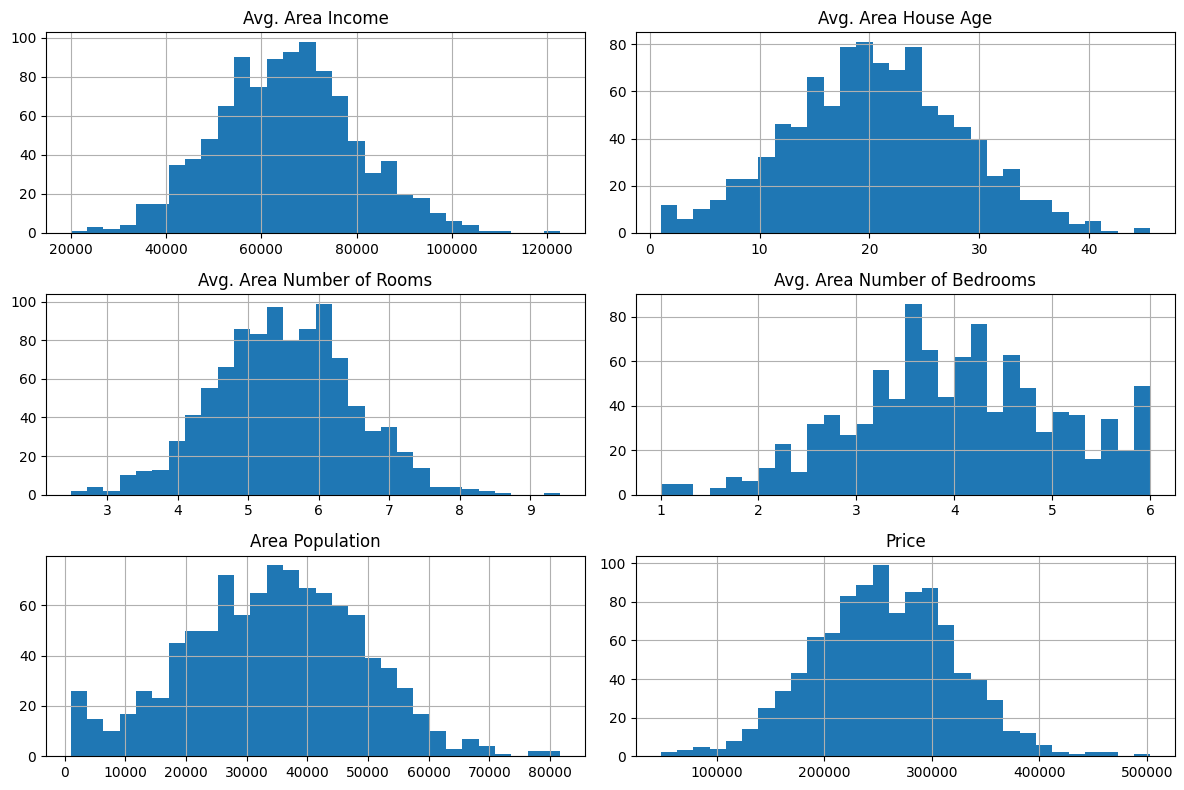

In [9]:
# Cell 7 — Histograms for numeric features
df.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

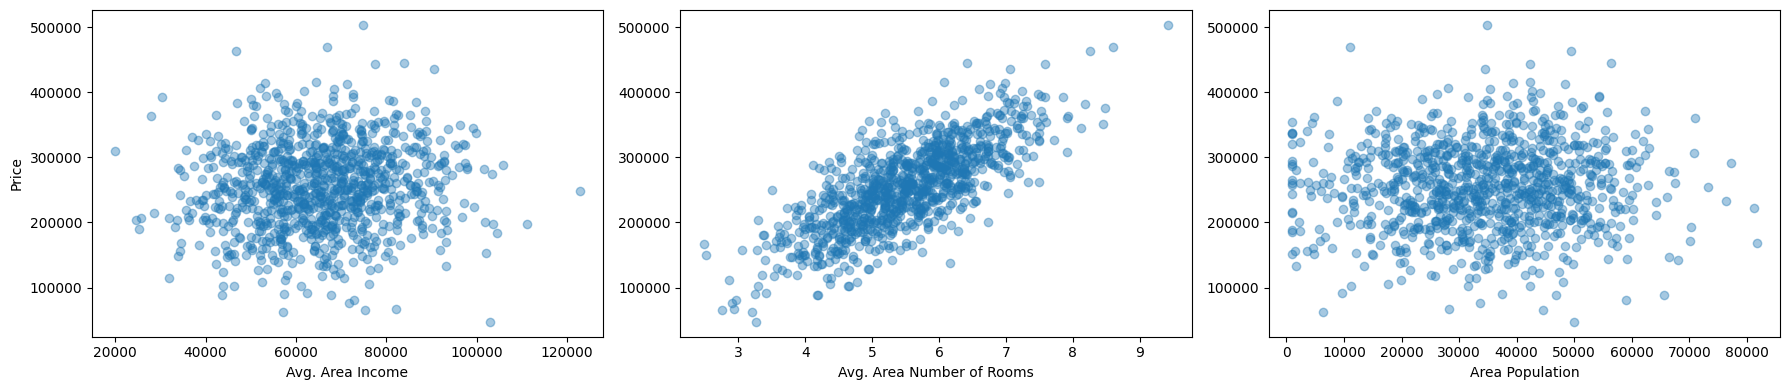

In [10]:
# Cell 8 — Scatter plots (Price vs important features)
fig, axes = plt.subplots(1, 3, figsize=(18,4))
axes[0].scatter(df['Avg. Area Income'], df['Price'], alpha=0.4)
axes[0].set_xlabel('Avg. Area Income')
axes[0].set_ylabel('Price')
axes[1].scatter(df['Avg. Area Number of Rooms'], df['Price'], alpha=0.4)
axes[1].set_xlabel('Avg. Area Number of Rooms')
axes[2].scatter(df['Area Population'], df['Price'], alpha=0.4)
axes[2].set_xlabel('Area Population')
plt.tight_layout()
plt.show()

In [11]:
# Cell 9 — Feature selection
# We'll use these features (you can experiment later)
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']
X = df[features]
y = df['Price']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 4)
y shape: (1000,)


In [12]:
# Cell 10 — Train/Test split and optional scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (recommended for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train.shape[0])


Training samples: 800


In [13]:
# Cell 11 — Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Model trained.")
print("Coefficients:")
for name, coef in zip(features, lr.coef_):
    print(f" - {name}: {coef:.2f}")
print("Intercept:", lr.intercept_)

Model trained.
Coefficients:
 - Avg. Area Income: 4069.08
 - Avg. Area House Age: -14902.62
 - Avg. Area Number of Rooms: 49859.14
 - Area Population: -419.69
Intercept: 255306.19197499997


In [14]:
# Cell 12 — Predict & Evaluation
y_pred = lr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"MSE: {mse:,.2f}")
print(f"MAE: {mae:,.2f}")

R2 Score: 0.6186
MSE: 1,560,660,714.32
MAE: 31,875.99


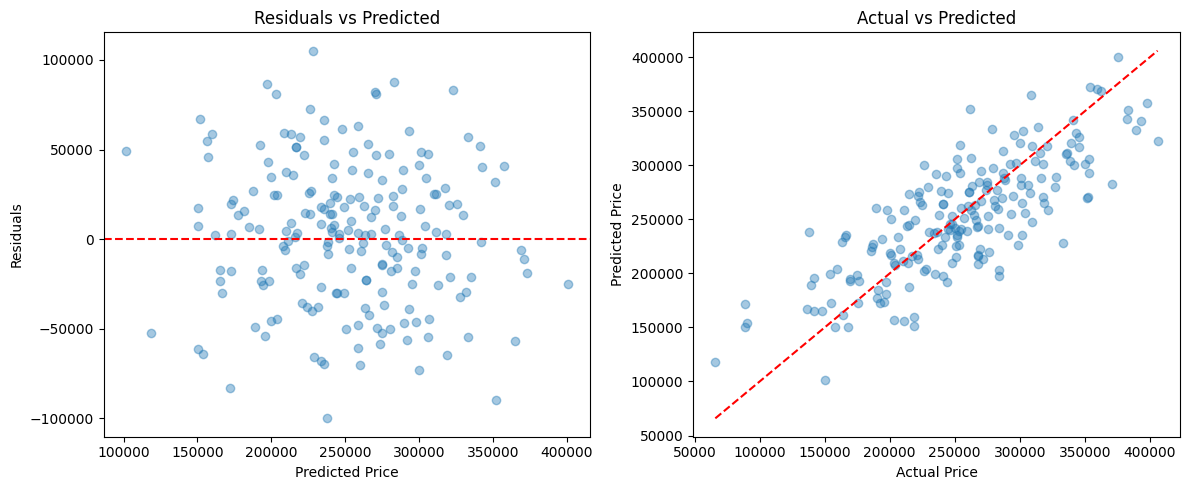

In [15]:
# Cell 13 — Residuals & Observed vs Predicted
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

In [16]:
# Cell 14 — Helper: predict on new data
def predict_price(income, house_age, rooms, population):
    arr = np.array([[income, house_age, rooms, population]])
    arr_scaled = scaler.transform(arr)
    pred = lr.predict(arr_scaled)[0]
    return float(pred)

# Example usage
example_price = predict_price(65000, 20, 5.5, 35000)
print(f"Example predicted price for sample input: ${example_price:,.2f}")

Example predicted price for sample input: $255,435.08


c:\Users\Z\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
# Cell 15 — (Optional) Save trained model for later use
# If you want to save the model, uncomment and run the following lines.
# This requires joblib (pip install joblib) or use pickle.
# import joblib
# joblib.dump({'model': lr, 'scaler': scaler, 'features': features}, 'house_price_model.joblib')
print("Optional: save the model with joblib.dump(...) if needed.")

Optional: save the model with joblib.dump(...) if needed.


In [23]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump({"model": lr, "scaler": scaler}, file)

print("Model + Scaler saved successfully as model.pkl")


Model + Scaler saved successfully as model.pkl



## Conclusions & Next Steps

- Linear Regression gives a quick baseline. Check R², MSE, MAE above to understand model quality.

**Next experiments you can try:**

1. Add more features (e.g., zipcode as categorical, interaction terms).

2. Try more powerful models: RandomForestRegressor, XGBoost, or GradientBoosting.

3. Do cross-validation and hyperparameter tuning (GridSearchCV).

4. Deploy the model as a simple web app (Streamlit / Flask).


---
**How to run:**
1. Place `HousePrice.ipynb` and `USA_Housing.csv` in the same folder.
2. (Optional) create venv and install requirements: `pip install -r requirements.txt`.
3. Open the notebook and run cells top-to-bottom.
